# Excess mortality in Russia during the covid19 pandemics
## Analysis and figures for the Significance-2021 paper

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import matplotlib

from matplotlib.patches import Polygon

In [2]:
months_eng = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']

months_eng_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

months_rus = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
              'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

months_rus_short = ['янв', 'фев', 'мар', 'апр', 'май', 'июн',
                    'июл', 'авг', 'сен', 'окт', 'ноя', 'дек']

## Names, locations, etc. of Russian regions

In [3]:
def rename(regions):
    regions[regions=='Hижегородская область'] = 'Нижегородская область'

    # in EMISS files
    regions[regions=='Город Москва столица Российской Федерации город федерального значения'] = 'Москва'
    regions[regions=='Город Санкт-Петербург город федерального значения'] = 'Санкт-Петербург'
    regions[regions=='Город федерального значения Севастополь'] = 'Севастополь'
    regions[regions=='Ненецкий автономный округ (Архангельская область)'] = 'Ненецкий АО'
    regions[regions=='Архангельская область (кроме Ненецкого автономного округа)'] = 'Архангельская область без АО'
    regions[regions=='Ханты-Мансийский автономный округ - Югра (Тюменская область)'] = 'Ханты-Мансийский АО'
    regions[regions=='Ямало-Ненецкий автономный округ (Тюменская область)'] = 'Ямало-Hенецкий АО'
    regions[regions=='Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)'] = 'Тюменская область без АО'
    regions[regions=='Чукотский автономный округ'] = 'Чукотский АО'
    regions[regions=='Еврейская автономная область'] = 'Еврейская АО'
    regions[regions=='Республика Адыгея (Адыгея)'] = 'Республика Адыгея'
    regions[regions=='Республика Татарстан (Татарстан)'] = 'Республика Татарстан' 
    regions[regions=='Чувашская Республика - Чувашия'] = 'Чувашская Республика'
    regions[regions=='Республика Северная Осетия-Алания'] = 'Северная Осетия'
    regions[regions=='Республика Саха (Якутия)'] = 'Якутия'
    regions[regions=='Кабардино-Балкарская Республика'] = 'Кабардино-Балкария'
    regions[regions=='Карачаево-Черкесская Республика'] = 'Карачаево-Черкесия'
    regions[regions=='Кемеровская область - Кузбасс'] = 'Кемеровская область'
    
    # in addition in Rosstat files
    regions[regions=='г.Москва'] = 'Москва'
    regions[regions=='г.Санкт-Петербург'] = 'Санкт-Петербург'
    regions[regions=='г.Севастополь'] = 'Севастополь'
    regions[regions=='Hенецкий авт.округ'] = 'Ненецкий АО'
    regions[regions=='Архангельская область без автономии'] = 'Архангельская область без АО'
    regions[regions=='Ханты-Мансийский авт.округ-Югра'] = 'Ханты-Мансийский АО'
    regions[regions=='Ямало-Hенецкий авт.округ'] = 'Ямало-Hенецкий АО'
    regions[regions=='Тюменская область без автономии'] = 'Тюменская область без АО'
    regions[regions=='Чукотский авт.округ'] = 'Чукотский АО'
    regions[regions=='Республика Татарстан(Татарстан)'] = 'Республика Татарстан'
    regions[regions=='Чувашская Республика(Чувашия)'] = 'Чувашская Республика'
    regions[regions=='Республика Северная Осетия- Алания'] = 'Северная Осетия'
    
    # in addition in Stopcoronavirus files
    regions[regions=='Ненецкий автономный округ'] = 'Ненецкий АО'
    regions[regions=='Республика Северная Осетия — Алания'] = 'Северная Осетия'
    regions[regions=='Республика Чувашия'] = 'Чувашская Республика'
    regions[regions=='Чукотский автономный округ'] = 'Чукотский АО'
    regions[regions=='Ямало-Ненецкий автономный округ'] = 'Ямало-Hенецкий АО'
    if 'Архангельская область без АО' not in regions:
        regions[regions=='Архангельская область'] = 'Архангельская область без АО'
        regions[regions=='Тюменская область'] = 'Тюменская область без АО'
        
    return regions

In [4]:
regions_table = {'Алтайский край':[3,12], 'Амурская область':[2,15],
       'Архангельская область без АО':[1,8], 'Астраханская область':[7,7],
       'Белгородская область':[6,4], 'Брянская область':[4,2], 'Владимирская область':[3,5],
       'Волгоградская область':[6,6], 'Вологодская область':[1,5],
       'Воронежская область':[6,5], 'Еврейская АО':[3,15], 'Забайкальский край':[1,15],
       'Ивановская область':[2,5], 'Иркутская область':[1,14], 'Кабардино-Балкария':[9,4],
       'Калининградская область':[1,0], 'Калужская область':[3,2], 'Камчатский край':[1,17],
       'Карачаево-Черкесия':[8,4], 'Кемеровская область':[1,13], 'Кировская область':[2,8],
       'Костромская область':[2,6], 'Краснодарский край':[7,4], 'Красноярский край':[0,13],
       'Курганская область':[2,11], 'Курская область':[5,3], 'Ленинградская область':[1,3],
       'Липецкая область':[5,4], 'Магаданская область':[1,16], 'Москва':[3,3],
       'Московская область':[3,4], 'Мурманская область':[0,4], 'Ненецкий АО':[0,9],
       'Нижегородская область':[3,6], 'Новгородская область':[1,4],
       'Новосибирская область':[2,12], 'Омская область':[3,11], 'Оренбургская область':[5,8],
       'Орловская область':[4,3], 'Пензенская область':[5,6], 'Пермский край':[2,9],
       'Приморский край':[3,16], 'Псковская область':[2,2], 'Республика Адыгея':[8,3],
       'Республика Алтай':[4,12], 'Республика Башкортостан':[4,9],
       'Республика Бурятия':[2,14], 'Республика Дагестан':[8,7],
       'Республика Ингушетия':[9,6], 'Республика Калмыкия':[7,6],
       'Республика Карелия':[0,3], 'Республика Коми':[1,9], 'Республика Крым':[7,3],
       'Республика Марий Эл':[2,7], 'Республика Мордовия':[4,6],
       'Республика Татарстан':[3,8], 'Республика Тыва':[3,13], 'Республика Хакасия':[2,13],
       'Ростовская область':[7,5], 'Рязанская область':[4,5], 'Самарская область':[4,8],
       'Санкт-Петербург':[1,2], 'Саратовская область':[5,7], 'Сахалинская область':[3,17],
       'Свердловская область':[2,10], 'Севастополь':[7,2], 'Северная Осетия':[9,5],
       'Смоленская область':[3,1], 'Ставропольский край':[8,5], 'Тамбовская область':[5,5],
       'Тверская область':[2,3], 'Томская область':[1,12], 'Тульская область':[4,4],
       'Тюменская область без АО':[1,11], 'Удмуртская Республика':[3,9],
       'Ульяновская область':[4,7], 'Хабаровский край':[2,16], 'Ханты-Мансийский АО':[1,10],
       'Челябинская область':[3,10], 'Чеченская Республика':[8,6],
       'Чувашская Республика':[3,7], 'Чукотский АО':[0,17], 'Якутия':[3,14],
       'Ямало-Hенецкий АО':[0,10], 'Ярославская область':[2,4]}

regions_short = ['Российская Федерация', 'Белгородская', 'Брянская',
       'Владимирская', 'Воронежская',
       'Ивановская', 'Калужская', 'Костромская',
       'Курская', 'Липецкая', 'Московская',
       'Орловская', 'Рязанская', 'Смоленская',
       'Тамбовская', 'Тверская', 'Тульская',
       'Ярославская', 'Москва', 'Карелия',
       'Коми', 'Ненецкий АО', 'Архангельская',
       'Вологодская', 'Калининградская',
       'Ленинградская', 'Мурманская',
       'Новгородская', 'Псковская', 'Петербург',
       'Адыгея', 'Калмыкия', 'Крым',
       'Краснодарский', 'Астраханская',
       'Волгоградская', 'Ростовская', 'Севастополь',
       'Дагестан', 'Ингушетия',
       'Каб-Балкария', 'Кар-Черкесия', 'Сев Осетия',
       'Чеченская', 'Ставропольский',
       'Башкортостан', 'Марий Эл',
       'Мордовия', 'Татарстан',
       'Удмуртия', 'Чувашия', 'Пермский',
       'Кировская', 'Нижегородская',
       'Оренбургская', 'Пензенская', 'Самарская',
       'Саратовская', 'Ульяновская', 'Курганская',
       'Свердловская', 'Ханты-Манс АО', 'Ямало-Hен АО',
       'Тюменская', 'Челябинская',
       'Алтай', 'Тыва', 'Хакасия',
       'Алтайский', 'Красноярский', 'Иркутская',
       'Кемеровская', 'Новосибирская', 'Омская',
       'Томская', 'Бурятия', 'Якутия',
       'Забайкальский', 'Камчатский', 'Приморский',
       'Хабаровский', 'Амурская', 'Магаданская',
       'Сахалинская', 'Еврейская АО', 'Чукотский АО']

In [5]:
coordinates={}
coordinates['Белгородская область'               ] = [145,575]
coordinates['Брянская область'                   ] = [140,510]
coordinates['Владимирская область'               ] = [245,530]
coordinates['Воронежская область'                ] = [170,590]
coordinates['Ивановская область'                 ] = [265,515]
coordinates['Калужская область'                  ] = [170,505]
coordinates['Костромская область'                ] = [300,500]
coordinates['Курская область'                    ] = [140,545]
coordinates['Липецкая область'                   ] = [180,560]
coordinates['Московская область'                 ] = [214,500]
coordinates['Орловская область'                  ] = [165,535]
coordinates['Рязанская область'                  ] = [220,550]
coordinates['Смоленская область'                 ] = [160,475]
coordinates['Тамбовская область'                 ] = [210,580]
coordinates['Тверская область'                   ] = [190,455]
coordinates['Тульская область'                   ] = [185,530]
coordinates['Ярославская область'                ] = [260,480]
coordinates['Москва'                             ] = [60, 460]
coordinates['Республика Карелия'                 ] = [290,360]
coordinates['Республика Коми'                    ] = [440,470]
coordinates['Ненецкий АО'                        ] = [480,400]
coordinates['Архангельская область без АО'       ] = [340,420]
coordinates['Вологодская область'                ] = [290,460]
coordinates['Калининградская область'            ] = [80,380]
coordinates['Ленинградская область'              ] = [240,410]
coordinates['Мурманская область'                 ] = [360,310]
coordinates['Новгородская область'               ] = [210,425]
coordinates['Псковская область'                  ] = [170,410]
coordinates['Санкт-Петербург'                    ] = [200,370]
coordinates['Республика Адыгея'                  ] = [90,690]
coordinates['Республика Калмыкия'                ] = [170,705]
coordinates['Краснодарский край'                 ] = [92,660]
coordinates['Астраханская область'               ] = [205,710]
coordinates['Волгоградская область'              ] = [195,645]
coordinates['Ростовская область'                 ] = [140,650]
coordinates['Республика Дагестан'                ] = [146,792]
coordinates['Республика Ингушетия'               ] = [127,760]
coordinates['Кабардино-Балкария'                 ] = [110,735]
coordinates['Карачаево-Черкесия'                 ] = [95,720]
coordinates['Северная Осетия'                    ] = [115,750]
coordinates['Чеченская Республика'               ] = [140,760]
coordinates['Ставропольский край'                ] = [125,710]
coordinates['Республика Башкортостан'            ] = [365,650]
coordinates['Республика Марий Эл'                ] = [320,560]
coordinates['Республика Мордовия'                ] = [250,570]
coordinates['Республика Татарстан'               ] = [320,600]
coordinates['Удмуртская Республика'              ] = [360,580]
coordinates['Чувашская Республика'               ] = [290,575]
coordinates['Пермский край'                      ] = [410,560]
coordinates['Кировская область'                  ] = [350,540]
coordinates['Нижегородская область'              ] = [270,550]
coordinates['Оренбургская область'               ] = [320,660]
coordinates['Пензенская область'                 ] = [250,600]
coordinates['Самарская область'                  ] = [300,630]
coordinates['Саратовская область'                ] = [250,640]
coordinates['Ульяновская область'                ] = [275,600]
coordinates['Курганская область'                 ] = [460,660]
coordinates['Свердловская область'               ] = [460,600]
coordinates['Ханты-Мансийский АО'                ] = [550,550]
coordinates['Ямало-Hенецкий АО'                  ] = [630,510]
coordinates['Тюменская область без АО'           ] = [510,640]
coordinates['Челябинская область'                ] = [420,660]
coordinates['Республика Алтай'                   ] = [700,800]
coordinates['Республика Бурятия'                 ] = [980,720]
coordinates['Республика Тыва'                    ] = [810,790]
coordinates['Республика Хакасия'                 ] = [750,755]
coordinates['Алтайский край'                     ] = [650,770]
coordinates['Забайкальский край'                 ] = [1060,710]
coordinates['Красноярский край'                  ] = [790,520]
coordinates['Иркутская область'                  ] = [900,670]
coordinates['Кемеровская область'                ] = [710,725]
coordinates['Новосибирская область'              ] = [620,710]
coordinates['Омская область'                     ] = [560,680]
coordinates['Томская область'                    ] = [660,650]
coordinates['Якутия'                             ] = [1030,430]
coordinates['Камчатский край'                    ] = [1390,360]
coordinates['Приморский край'                    ] = [1340,730]
coordinates['Хабаровский край'                   ] = [1200,510]
coordinates['Амурская область'                   ] = [1160,630]
coordinates['Магаданская область'                ] = [1250,320]
coordinates['Сахалинская область'                ] = [1355,575]
coordinates['Еврейская АО'                       ] = [1265,690]
coordinates['Чукотский АО'                       ] = [1260,150]
coordinates['Республика Крым'                    ] = [35,620]
coordinates['Севастополь'                        ] = [20,625]

In [6]:
regionsToEnglish = {'Москва':'Moscow', 
                    'Московская область':'Moscow Oblast',
                    'Санкт-Петербург':'St. Petersburg',       
                    'Республика Татарстан':'Tatarstan',
                    'Республика Башкортостан':'Bashkortostan',
                    'Краснодарский край':'Krasnodar Krai',
                    'Свердловская область':'Sverdlovsk Oblast',
                    'Самарская область':'Samara Oblast',
                    'Республика Дагестан':'Dagestan',
                    'Челябинская область':'Chelyabinsk Oblast',
                    'Нижегородская область':'Nizhny Novgorod Oblast',
                    'Ростовская область':'Rostov Oblast',
                    'Волгоградская область':'Volgograd Oblast',
                    'Ленинградская область':'Leningrad Oblast',
                    'Пензенская область':'Penza Oblast',
                    'Оренбургская область':'Orenburg Oblast',
                    'Новосибирская область':'Novosibirsk Oblast',
                    'Пермский край':'Perm Krai',
                   }

regionsToEnglishShort = {
                    'Москва':'Moscow', 
                    'Московская область':'Moscow Oblast',
                    'Санкт-Петербург':'St. Petersburg',       
                    'Республика Татарстан':'Tatarstan',
                    'Республика Башкортостан':'Bashkortostan',
                    'Краснодарский край':'Krasnodar Krai',
                    'Свердловская область':'Sverdlovsk O.',
                    'Самарская область':'Samara O.',
                    'Республика Дагестан':'Dagestan',
                    'Челябинская область':'Chelyabinsk O.',
                    'Нижегородская область':'N. Novgorod O.',
                    'Ростовская область':'Rostov O.',
                    'Волгоградская область':'Volgograd O.',
                    'Ленинградская область':'Leningrad O.',
                    'Пензенская область':'Penza O.',
                    'Оренбургская область':'Orenburg O.',
                    'Новосибирская область':'Novosibirsk O.',
                    'Пермский край':'Perm Krai',
                        }

## Load data

Data sources:

* https://www.fedstat.ru/indicator/33556

* https://www.fedstat.ru/indicator/31556

* https://rosstat.gov.ru/storage/mediabank/ldMWepjj/edn11-2020.htm

* https://docs.google.com/spreadsheets/d/1nCxvNcuZGNswsf97mliLikmUIsOrOGZtL-VI7xfN-Zw (scraped by Sergey Shpilkin)

In [7]:
table = pd.read_excel('russian-data/data.xls')

regions = table.values[3:,0]
regions = np.array([r.strip(' *') for r in regions])

deaths = table.values[3:,1:].astype(float)

# fill in fields that are empty for some years for unclear reasons
deaths[regions=='Архангельская область (кроме Ненецкого автономного округа)',:] = \
    deaths[regions=='Архангельская область',:] - \
    deaths[regions=='Ненецкий автономный округ (Архангельская область)',:]

deaths[regions=='Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)',:] = \
    deaths[regions=='Тюменская область',:] - \
    deaths[regions=='Ханты-Мансийский автономный округ - Югра (Тюменская область)',:] - \
    deaths[regions=='Ямало-Ненецкий автономный округ (Тюменская область)',:]

kickout = np.isnan(deaths[:,-1])
kickout |= np.array(['федеральный округ' in r for r in regions])
kickout |= np.isin(regions, ['Архангельская область', 'Тюменская область'])

regions = regions[~kickout]
deaths = deaths[~kickout]

regions = rename(regions)

assert(all(deaths[0] == np.nansum(deaths[1:],axis=0)))

In [8]:
deaths_year = np.zeros((regions.size, 15, 12)) * np.nan
for y in range(14):
    deaths_year[:,y,:] = deaths[:, y*12:(y+1)*12]
deaths_year[:,14,:deaths.shape[1]-14*12] = deaths[:, 14*12:]

deaths = deaths_year

In [9]:
# Append last months

d = pd.read_excel('russian-data/edn10_2020.xlsx', sheet_name='t1_1')
r = d.values[:,0][4:]
d = d.values[:,5][4:]
r = np.array([a.strip() for a in r])
r = rename(r)

for i,reg in enumerate(regions):
    deaths[i,-1,9] = d[r==reg][0]
    
d = pd.read_excel('russian-data/edn11_2020.xlsx', sheet_name='t1_1')
r = d.values[:,0][4:]
d = d.values[:,5][4:]
r = np.array([a.strip() for a in r])
r = rename(r)

for i,reg in enumerate(regions):
    deaths[i,-1,10] = d[r==reg][0]

In [10]:
print(deaths[0,-1])

[164075. 143179. 152740. 150873. 172914. 162758. 181479. 157181. 170717.
 205456. 219872.     nan]


In [11]:
covid_deaths = np.zeros((regions.size, 12, 4))

files = ['edn04_2020.xlsx', 'edn05_2020.xlsx', 'edn06_2020.xlsx',
         'edn07_2020.xlsx', 'edn08_2020.xlsx', 'edn09_2020.xlsx',
         'edn10_2020.xlsx', 'edn11_2020.xlsx']
sheets = ['5.1', '5_1', '5_1', 't5_1', '5.1', '5.1', '5.1', 't5_1']
fromrow = [6,5,6,6,6,6,5,5]

for month, (file, sheet, row) in enumerate(zip(files, sheets, fromrow)):
    d = pd.read_excel('russian-data/'+file, sheet_name=sheet)
    r = d.values[:,0][row:-1]
    d = d.values[:,[2,3,5,6]][row:-1,:]
    r = np.array([a.strip() for a in r])
    r = rename(r)
    for i,reg in enumerate(regions):
        covid_deaths[i,3+month,:] = d[r==reg][0]

covid_deaths[np.isnan(covid_deaths)] = 0
    
assert(np.all(covid_deaths[0] == np.sum(covid_deaths[1:,:,:], axis=0)))

print(np.sum(covid_deaths,axis=0), '\n')
print(np.sum(covid_deaths[0],axis=0), '\n')
print(np.sum(covid_deaths[0]))

[[    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [ 2700.   796.   870.  1284.]
 [11852.  3354.  3218.  6914.]
 [11650.  2984.  2968.  7068.]
 [10126.  2042.  2474.  6100.]
 [ 6872.  1164.  2368.  4942.]
 [ 9158.  1718.  2856.  6626.]
 [26154.  4052.  3588. 14872.]
 [39252.  7968.  4356. 19714.]
 [    0.     0.     0.     0.]] 

[58882. 12039. 11349. 33760.] 

116030.0


In [12]:
table = pd.read_excel('russian-data/data_population.xls')

r = table.values[2:,0]
r = np.array([a.strip(' *') for a in r])
r = rename(r)
pop = table.values[2:,2].astype(float)

population = np.zeros(regions.size)
for i,reg in enumerate(regions):
    population[i] = pop[r==reg][0]

In [13]:
table = pd.read_csv('russian-data/StopCoronaRF - died.csv')
off = table.values[:,table.columns=='01.12.2020'].flatten()
r = table.values[:,0]
r = rename(r)

official_deaths = np.zeros(regions.size)
official_deaths_monthly = np.zeros((regions.size, 12))
for i,reg in enumerate(regions):
    if reg != 'Российская Федерация':
        official_deaths[i] = off[r==reg][0]
        for m in range(12):
            if m==11:
                nextm = 1
                nexty = 2021
            else:
                nextm = m+2
                nexty = 2020
            if f'01.{nextm:02d}.{nexty}' in table.columns and f'01.{m+1:02d}.2020' in table.columns:
                official_deaths_monthly[i,m] = \
                    table.values[:,table.columns==f'01.{nextm:02d}.{nexty}'].flatten()[r==reg][0] - \
                    table.values[:,table.columns==f'01.{m+1:02d}.2020'].flatten()[r==reg][0]
            else:
                official_deaths_monthly[i,m] = np.nan
official_deaths[regions=='Российская Федерация'] = np.sum(official_deaths)
official_deaths_monthly[regions=='Российская Федерация',:] = np.sum(official_deaths_monthly,axis=0)

print(official_deaths[0])
print(official_deaths_monthly[0])

40464.0
[   nan    nan    nan  1145.  3686.  4681.  4522.  3241.  3592.  7344.
 12229. 17091.]


## Compute excess deaths

In [14]:
# Compared to 2019
deaths_model = deaths[:,-2,:]
excess = deaths[:,-1,:] - deaths_model
total = np.nansum(excess[:,3:], axis=1)
print(total[0])

# Compared to the 2017-19 avearge
deaths_model = np.mean(deaths[:,-4:-1,:], axis=1)
excess = deaths[:,-1,:] - deaths_model
total = np.nansum(excess[:,3:], axis=1)
print(total[0])

# Compared to the 2015-19 average
deaths_model = np.mean(deaths[:,-6:-1,:], axis=1)
excess = deaths[:,-1,:] - deaths_model
total = np.nansum(excess[:,3:], axis=1)
print(total[0])

242598.0
230763.33333333334
212433.4


In [15]:
from scipy import stats

yearly = np.mean(deaths,axis=2)
for r in range(yearly.shape[0]):
    b = stats.linregress(np.arange(2015, 2020), yearly[r,-6:-1])
    yearly[r,-1] = b.intercept + b.slope * 2020
    
monthly = np.nanmedian(deaths[:,:-1,:] - yearly[:,:-1,np.newaxis], axis=1)

deaths_model = monthly + yearly[:,-1][:,np.newaxis]

excess = deaths[:,-1,:] - deaths_model
total = np.nansum(excess[:,3:], axis=1)

ratio = excess / deaths_model
maxratio = np.nanmax(ratio,axis=1)
fullratio = total / np.sum(deaths_model[:,~np.isnan(ratio[0])][:,3:], axis=1)
yearratio = total / np.sum(deaths_model, axis=1)

excess_permln = excess / population[:,np.newaxis] * 1e+6
total_permln  = total / population * 1e+6

print(np.round(excess[0,:]))
print(f'{total[0]:.0f}')
print(' '.join([f'{r*100:.0f}%' for r in ratio[0]]))
print(' '.join([f'{r*100:.0f}%' for r in excess[0]/np.sum(deaths_model[0])]))
print(' '.join([f'{r:.1f}' for r in excess[0]/official_deaths_monthly[0]]))
print(f'{np.sum(total[1:]):.0f}')
print(f'{total_permln[0]:.0f}')
print(f'{fullratio[0]*100:.1f}%')
print(f'{yearratio[0]*100:.1f}%')

print(f'{np.nansum(excess[0,:]):.0f}')

[  511.  1536. -3902.  4771. 21070. 18950. 34728. 14410. 33590. 56120.
 80461.    nan]
264100
0% 1% -2% 3% 14% 13% 24% 10% 24% 38% 58% nan%
0% 0% -0% 0% 1% 1% 2% 1% 2% 3% 5% nan%
nan nan nan 4.2 5.7 4.0 7.7 4.4 9.4 7.6 6.6 nan
266709
1799
22.8%
15.0%
262245


In [16]:
r=0

X = np.concatenate((np.ones((5,1)), np.arange(2015,2020)[:,np.newaxis]), axis=1)
y = yearly[r,-6:-1][:,np.newaxis]
b = np.linalg.inv(X.T @ X) @ X.T @ y
yhat = X @ b
sigma2 = np.sum((y-yhat)**2) / (5-2)
x = np.array([[1], [2020]])
yhat = b.T @ x
print(yhat[0][0])

predictive_var = sigma2 * (1 + x.T @ np.linalg.inv(X.T @ X) @ x)
predictive_std = np.sqrt(predictive_var)[0][0]

print(predictive_std)

a = 3
b = np.where(np.isnan(deaths[r,-1,:]))[0][0]
print(predictive_std*(b-a))
print(predictive_std*(b-a)*np.array([-1.96,1.96]) + total[0])

147164.28328810912
2048.718950118371
16389.75160094697
[231975.77852881 296223.60480452]


## Comparison betwen countries

https://www.nytimes.com/interactive/2020/04/21/world/coronavirus-missing-deaths.html  
https://www.economist.com/graphic-detail/2020/07/15/tracking-covid-19-excess-deaths-across-countries  
https://www.ft.com/content/a2901ce8-5eb7-4633-b89c-cbdf5b386938

Iran:   
https://www.medrxiv.org/content/10.1101/2020.12.07.20245621v1.full

Daily data: https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory#Total_cases_and_deaths  
Mortality rate: https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_mortality_rate

In [17]:
# Now is Jan 1, 2021

data = [['United States 🇺🇸', 349397, 'Ec', 'Dec 12', 375065, 290791, 0, 328.2],
        ['Brazil 🇧🇷',        194976, 'Ec','Nov 21', 184202, 168974, 0, 209.5],
        ['India 🇮🇳',         148994, '', '', np.nan, np.nan, 0, 1353], 
        ['Mexico 🇲🇽',        125807, 'Ec', 'Nov 21', 251805, 101357, 0, 126.2],
        ['Italy 🇮🇹',          74159, 'Ec', 'Oct 27', 63645, 36963, 0, 60.4],
        ['United Kingdom 🇬🇧', 74125, 'Ec', 'Dec 18', 82146, 53368, 0, 66.7], # COVID DEATHS FROM OURWORLDINDATA
        ['France 🇫🇷',         64632, 'Ec', 'Dec 1', 55186, 52094, 0, 67.0],
        ['Russia 🇷🇺',         57555, 'DK', 'Nov 30', total[0], official_deaths[0], 0, 146.8],
        ['Iran 🇮🇷',           55337, 'Ghafari et al.', 'Sep 21', 58900, 24301, 0, 81.9], #7931+19460+40851
        ['Spain 🇪🇸',          50837, 'Ec', 'Dec 29', 69702, 49974, 0, 46.7],
        ['Argentina 🇦🇷',      43245, '', '', np.nan, np.nan, 0, 44.5],
        ['Colombia 🇨🇴',       43213, 'NYT', 'Oct 4', 27000, 28787, 0, 49.7],
        ['Peru 🇵🇪',           37680, 'Ec', 'Dec 31', 86156, 37650, 0, 32.0],
        ['Germany 🇩🇪',        34222, 'Ec', 'Nov 24', 17290, 14808, 0, 83.02],
        ['Poland 🇵🇱',         28956, 'FT', 'Oct', 16546, 5783, 0, 38.0],
        ['South Africa 🇿🇦',   28469, 'Ec', 'Dec 29', 58315, 27541, 0, 57.8],
        ['Indonesia 🇮🇩',      22329, '', '', np.nan, np.nan, 0, 267.7],
        ['Turkey 🇹🇷',         20881, '', '', np.nan, np.nan, 0, 82],
        ['Belgium 🇧🇪',        19528, 'Ec', 'Dec 15', 19836, 18299, 0, 11.5],
        ['Ukraine 🇺🇦',        18680, 'DK', 'Oct 31', 13168, 7515, 0, 42.0],
        ['Chile 🇨🇱',          16608, 'Ec', 'Dec 29', 14075, 16444, 0, 18.7],
        ['Romania 🇷🇴',        15841, '', '', np.nan, np.nan, 0, 19.4],
        ['Canada 🇨🇦',         15606, '', '', np.nan, np.nan, 0, 37.6],
        ['Ecuador 🇪🇨',        14032, 'Ec', 'Sep 30', 34067, 11355, 0, 17.08],
        ['Iraq 🇮🇶',           12824, '', '', np.nan, np.nan, 0, 38.4],
        ['Czech Republic 🇨🇿', 11711, '', '', np.nan, np.nan, 0, 10.7],
        ['Netherlands 🇳🇱',    11432, 'Ec', 'Dec 25', 15988, 11005, 0, 17.3],
        ['Pakistan 🇵🇰',       10176, '', '', np.nan, np.nan, 0, 212.2],
        ['Hungary 🇭🇺',         9667, '', '', np.nan, np.nan, 0, 9.8],
        ['Philippines 🇵🇭',     9248, '', '', np.nan, np.nan, 0, 106.7],
        ['Bolivia 🇧🇴',         9165, 'NYT', 'Sep', 25600,7965, 0, 11.4],
       ]

df = pd.DataFrame(data, columns=['Country', 'Covid19 deaths, now', 'Source',
                                 'Mortality data until', 'Excess deaths', 
                                 'Covid19 deaths', 'Underreporting (excess deaths / covid19 deaths)', 
                                 'Population (mln)'])

df['Underreporting (excess deaths / covid19 deaths)'] = df['Excess deaths'] / df['Covid19 deaths']
df['Excess deaths per million'] = df['Excess deaths'] / df['Population (mln)']
df.index += 1

df['Estimated deaths'] = np.maximum(df['Underreporting (excess deaths / covid19 deaths)'],1) * df['Covid19 deaths, now']
df['Estimated deaths per 100,000'] = df['Estimated deaths'] / df['Population (mln)'] / 10

df.style.format({'Underreporting (excess deaths / covid19 deaths)': lambda x: f'{x:.1f}' if ~np.isnan(x) else '', 
                 'Excess deaths':  lambda x: f'{1000*(x/1000).round():,.0f}' if ~np.isnan(x) else '',
                 'Covid19 deaths': lambda x: f'{x:,.0f}' if ~np.isnan(x) else '',
                 'Excess deaths per million': 
                                   lambda x: f'{10*(x/10).round():,.0f}' if ~np.isnan(x) else '',
                 'Population (mln)': '{:.1f}',
                 'Estimated deaths': 
                                   lambda x: f'{1000*(x/1000).round():,.0f}' if ~np.isnan(x) else '',
                 'Estimated deaths per 100,000': 
                                   lambda x: f'{np.round(x):,.0f}' if ~np.isnan(x) else '',
                 'Covid19 deaths, now': '{:,.0f}'}).set_caption(
    'Excess mortality estimates').hide_columns(
    ['Population (mln)','Excess deaths per million','Mortality data until','Excess deaths','Covid19 deaths']).set_table_styles(
    [dict(selector='th', props=[('max-width', '180px')])])

,Country,"Covid19 deaths, now",Source,Underreporting (excess deaths / covid19 deaths),Estimated deaths,"Estimated deaths per 100,000"
1,United States 🇺🇸,"349,397",Ec,1.3,"451,000",137
2,Brazil 🇧🇷,"194,976",Ec,1.1,"213,000",101
3,India 🇮🇳,"148,994",,,,
4,Mexico 🇲🇽,"125,807",Ec,2.5,"313,000",248
5,Italy 🇮🇹,"74,159",Ec,1.7,"128,000",211
6,United Kingdom 🇬🇧,"74,125",Ec,1.5,"114,000",171
7,France 🇫🇷,"64,632",Ec,1.1,"68,000",102
8,Russia 🇷🇺,"57,555",DK,6.5,"376,000",256
9,Iran 🇮🇷,"55,337",Ghafari et al.,2.4,"134,000",164
10,Spain 🇪🇸,"50,837",Ec,1.4,"71,000",152


# Figures for the paper

<IPython.core.display.Javascript object>


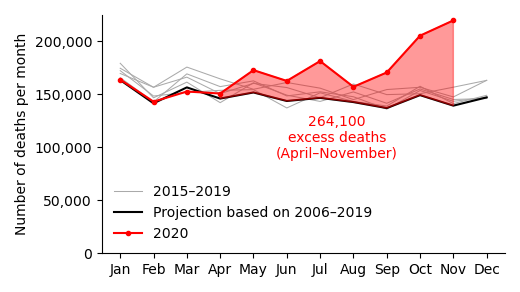

In [18]:
fig = plt.figure(figsize=(8*.65, 4.5*.65))

r=0
plt.plot(deaths[r, -6:-2, :].T, linewidth=.75, color='#aaaaaa', label='')
plt.plot(deaths[r, -2, :].T, linewidth=.75, color='#aaaaaa', label='2015–2019')
plt.plot(deaths_model[r,:], 'k', linewidth=1.5, label='Projection based on 2006–2019')
plt.plot(deaths[r, -1, :], 'r.-', linewidth=1.5, label='2020')
plt.legend(frameon=False)

a = 3
b = np.where(np.isnan(deaths[r,-1,:]))[0][0]
poly = np.zeros(((b-a)*2, 2))
poly[:,0] = np.concatenate((np.arange(a,b), np.arange(b-1,a-1,-1)))
poly[:,1] = np.concatenate((deaths[r,-1,a:b], deaths_model[r,a:b][::-1]))
poly = Polygon(poly, facecolor='r', edgecolor='r', alpha=.4, zorder=5)
plt.gca().add_patch(poly)

plt.text(6.5,90000,f'{np.round(total[0]/100)*100:,.0f}\nexcess deaths\n(April–November)',
         color='r', ha='center')

plt.ylabel('Number of deaths per month')
plt.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(np.arange(12), months_eng_short)
plt.ylim([0,225000])

sns.despine()
plt.tight_layout()

plt.savefig('img/fig1.png', dpi=200)
plt.savefig('img/fig1.pdf')

In [19]:
r = total/(official_deaths+.0001)
r[official_deaths==0] = 0
ind = np.argsort(r)
for i in ind[::-1]:
    if r[i]>20:
        print(f'{regions[i]:25} - {r[i]:.1f}')

Республика Башкортостан   - 114.8
Республика Татарстан      - 68.5
Сахалинская область       - 67.5
Чеченская Республика      - 33.8
Белгородская область      - 33.6
Республика Мордовия       - 28.1
Челябинская область       - 27.8
Липецкая область          - 27.3
Ярославская область       - 27.0
Рязанская область         - 26.1
Ленинградская область     - 25.0
Тамбовская область        - 24.9
Оренбургская область      - 23.8
Самарская область         - 21.0
Саратовская область       - 20.6


In [20]:
r = yearratio
ind = np.argsort(r)
for i in ind[::-1]:
    if r[i]>0.2:
        print(f'{regions[i]:25} - {r[i]:.2f}')

Чеченская Республика      - 0.37
Республика Дагестан       - 0.30
Ямало-Hенецкий АО         - 0.27
Республика Ингушетия      - 0.27
Республика Татарстан      - 0.22
Самарская область         - 0.22
Оренбургская область      - 0.21
Пензенская область        - 0.20
Омская область            - 0.20
Липецкая область          - 0.20


<IPython.core.display.Javascript object>


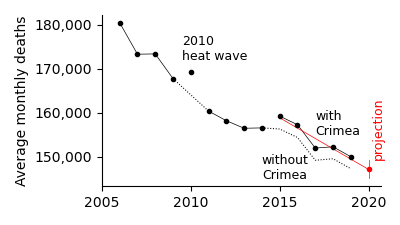

In [21]:
r = 0

plt.figure(figsize=(8/2,4.5/2))
plt.plot(np.arange(2006,2020), yearly[r][:-1],'k.')

plt.plot(np.arange(2006,2010), yearly[0][:4], 'k-', zorder=-1, lw=.5)
plt.plot(np.arange(2011,2015), yearly[0][5:-6], 'k-', zorder=-1, lw=.5)
plt.plot(np.arange(2015,2020), yearly[0][-6:-1], 'k-', zorder=-1, lw=.5)

plt.plot([2009,2011], [yearly[0][3],yearly[0][5]], 'k:', zorder=-1, lw=.75)

excl = ['Российская Федерация', 'Республика Крым', 'Севастополь']
plt.plot(np.arange(2014,2020), 
         np.nansum(yearly[[r not in excl for r in regions],:], axis=0)[-7:-1], 
         'k:', zorder=-1, lw=.75)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

xs = np.linspace(2015,2020,1000).reshape(-1,1)
model = make_pipeline(PolynomialFeatures(1), LinearRegression())
ys = model.fit(np.arange(2015,2020).reshape(-1,1), yearly[r][-6:-1]).predict(xs)
plt.plot(xs[-1], ys[-1], 'r.', lw=.5)
plt.plot(xs, ys, 'r', lw=.5, zorder=-1)

X = np.concatenate((np.ones((5,1)), np.arange(2015,2020)[:,np.newaxis]), axis=1)
y = yearly[r,-6:-1][:,np.newaxis]
b = np.linalg.inv(X.T @ X) @ X.T @ y
yhat = X @ b
sigma2 = np.sum((y-yhat)**2) / (5-2)
x = np.array([[1], [2020]])
yhat = b.T @ x
predictive_var = sigma2 * (1 + x.T @ np.linalg.inv(X.T @ X) @ x)
predictive_std = np.sqrt(predictive_var)[0][0]

plt.plot([xs[-1],xs[-1]], [ys[-1]-predictive_std, ys[-1]+predictive_std], 'r', lw=.5)

plt.xticks([2005,2010,2015,2020])
plt.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Average monthly deaths')
sns.despine()
plt.tight_layout()

plt.text(2009.5,172000,'2010\nheat wave', fontsize=9)
plt.text(2017,155000,'with\nCrimea', fontsize=9)
plt.text(2014,145000,'without\nCrimea', fontsize=9)
plt.text(2020.2,150000,'projection', fontsize=9, color='r', rotation=90)

plt.savefig('img/box.png', dpi=200)
plt.savefig('img/box.pdf')

<IPython.core.display.Javascript object>


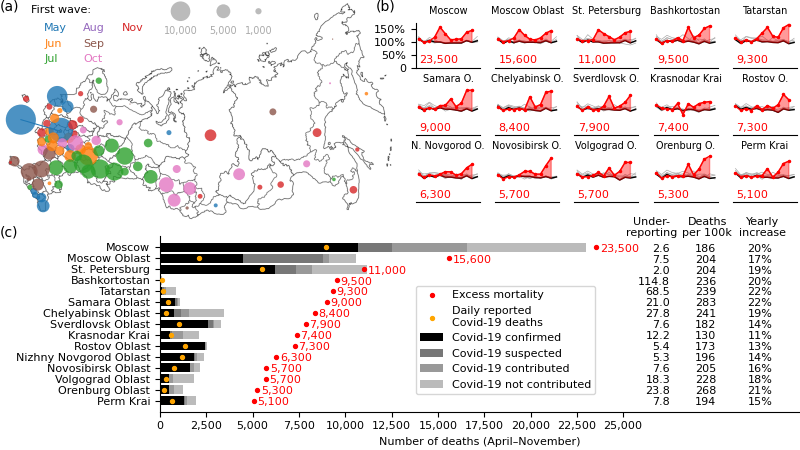

In [22]:
fig = plt.figure(figsize=(8,4.5))
ax1 = plt.axes([.2,.085,.8,.39])
ax2 = plt.axes([0,.5,.5,.5])

In [23]:
import matplotlib.image as mpimg
rusmap = mpimg.imread('russian-data/map.png')

plt.sca(ax2)
plt.imshow(rusmap)

peak = np.zeros(regions.size)
for i in range(peak.size):
    f = np.where(ratio[i]>0.25)[0]
    if f.size>0:
        peak[i] = f[0]
        
print(f'Minimum max-ratio across all regions: {np.min(np.nanmax(ratio,axis=1)):.2f}')
        
mycolors = matplotlib.colors.ListedColormap(np.array(plt.get_cmap('tab10').colors)[[0,1,2,4,5,6,3,7,8,9]])

for r in range(1,regions.size):
    area = total[r]/50
    if peak[r]>0:
        plt.scatter(coordinates[regions[r]][0],
                coordinates[regions[r]][1],
                s = area, c = peak[r]-4, edgecolor='none', 
                vmin=0, vmax=10, alpha=.8, cmap=mycolors)
    else:
        plt.scatter(coordinates[regions[r]][0],
                coordinates[regions[r]][1],
                s = area, c = '#aaaaaa', edgecolor='none', alpha=.8)
        
plt.plot([coordinates['Москва'][0],214],
         [coordinates['Москва'][1],505], 
         linewidth=.75, color=plt.get_cmap('tab10')(0))

plt.text(100, 50, 'First wave:', color='k', fontsize=8)
plt.text(150,  120, 'May', color=mycolors(0), fontsize=8)
plt.text(150,  180, 'Jun', color=mycolors(1), fontsize=8)
plt.text(150,  240, 'Jul', color=mycolors(2), fontsize=8)
plt.text(300, 120, 'Aug', color=mycolors(3), fontsize=8)
plt.text(300, 180, 'Sep', color=mycolors(4), fontsize=8)
plt.text(300, 240, 'Oct', color=mycolors(5), fontsize=8)
plt.text(450, 120, 'Nov', color=mycolors(6), fontsize=8)
# plt.text(450, 180, 'Dec', color=mycolors(7), fontsize=8)

plt.scatter(.45, .95, transform=plt.gca().transAxes, s=10000/50,
            c='#aaaaaa', edgecolor='none', alpha=.8)
plt.scatter(.56, .95, transform=plt.gca().transAxes, s=5000/50,
            c='#aaaaaa', edgecolor='none', alpha=.8)
plt.scatter(.65, .95, transform=plt.gca().transAxes, s=1000/50,
            c='#aaaaaa', edgecolor='none', alpha=.8)
plt.text(.45, .85, '10,000', transform=plt.gca().transAxes, c='#aaaaaa', 
         fontsize=7, ha='center')
plt.text(.56, .85, '5,000', transform=plt.gca().transAxes, c='#aaaaaa', 
         fontsize=7, ha='center')
plt.text(.65, .85, '1,000', transform=plt.gca().transAxes, c='#aaaaaa', 
         fontsize=7, ha='center')
    
plt.xticks([])
plt.yticks([])
sns.despine(ax=ax2, left=True, bottom=True)

Minimum max-ratio across all regions: 0.27


In [24]:
n=15
ind = np.argsort(total[1:])[::-1][:n]
y1=np.sum(covid_deaths[1:,:,0], axis=1)[ind]
y2=np.sum(covid_deaths[1:,:,1], axis=1)[ind]
y3=np.sum(covid_deaths[1:,:,2], axis=1)[ind]
y4=np.sum(covid_deaths[1:,:,3], axis=1)[ind]
y5=total[1:][ind]

plt.sca(ax1)
plt.barh(-np.arange(ind.size), y1, color='black', label='Сovid-19 confirmed')
plt.barh(-np.arange(ind.size), y2, left=y1, color='#777777', label='Сovid-19 suspected')
plt.barh(-np.arange(ind.size), y3, left=y1+y2, color='#999999', label='Сovid-19 contributed')
plt.barh(-np.arange(ind.size), y4, left=y1+y2+y3, color='#bbbbbb', label='Сovid-19 not contributed')
plt.scatter(y5, -np.arange(ind.size), s=8, color='red', label='Excess mortality',
                clip_on=False, zorder=4)
plt.scatter(official_deaths[1:][ind], -np.arange(ind.size), s=8, color='orange', 
                label='Daily reported\nCovid-19 deaths', clip_on=False, zorder=3)

for i,r in enumerate(ind):
    plt.text(y5[i]+200, -i-.4, f'{np.round(y5[i]/100)*100:,.0f}', color='red', fontsize=8)
    plt.text(np.max(y5)+4000, -i-.4, f'{y5[i]/official_deaths[1:][ind][i]:.1f}', 
             color='k', fontsize=8, ha='right').set_clip_on(True)
    plt.text(np.max(y5)+6500, -i-.4, f'{np.round(total_permln[1:][ind][i]/10):.0f}', 
             color='k', fontsize=8, ha='right').set_clip_on(True)
    plt.text(np.max(y5)+9500, -i-.4, f'{yearratio[1:][ind][i]*100:.0f}%', 
             color='k', fontsize=8, ha='right').set_clip_on(True)

plt.text(np.max(y5)+3000, 1, 'Under-\nreporting', fontsize=8, ha='center')
plt.text(np.max(y5)+6000, 1, 'Deaths\nper 100k', fontsize=8, ha='center')
plt.text(np.max(y5)+9000, 1, 'Yearly\nincrease', fontsize=8, ha='center')

plt.xlim([0,np.max(y5)+11000])
plt.xticks(np.arange(0,25001,2500), fontsize=8)
plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylim([-ind.size,1])
plt.yticks(-np.arange(ind.size), [regionsToEnglish[r] for r in regions[1:][ind]], fontsize=8)
plt.legend(loc=[.4,.1], fontsize=8)
plt.xlabel('Number of deaths (April–November)', fontsize=8)

sns.despine(ax=ax1)

In [25]:
for i,r in enumerate(ind+1):
    ax = plt.axes([.52+(i%5)*.099, 1-(1+np.floor(i/5))*.15, .08, .1])
                  
    plt.plot(deaths[r, -6:-1, :].T, color='#aaaaaa', linewidth=.5, clip_on=False)
    plt.plot(deaths_model[r,:], 'k', linewidth=1, clip_on=False)
    plt.plot(deaths[r, -1, :], 'r.-', linewidth=1, markersize=3, clip_on=False)
    
    a = 3
    b = np.where(np.isnan(deaths[r,-1,:]))[0][0]
    poly = np.zeros(((b-a)*2, 2))
    poly[:,0] = np.concatenate((np.arange(a,b), np.arange(b-1,a-1,-1)))
    poly[:,1] = np.concatenate((deaths[r,-1,a:b], deaths_model[r,a:b][::-1]))
    poly = Polygon(poly, facecolor='r', edgecolor='r', alpha=.4, zorder=5)
    plt.gca().add_patch(poly)
    
    plt.xticks([])
    ym = np.mean(deaths_model[r,])
    plt.ylim([0, ym*1.75])
    plt.xlim([-0.5,11.5])    
    if i>0:
        plt.yticks([])
    else:
        plt.yticks([0,ym/2,ym,ym*1.5],['0','50%','100%','150%'], fontsize=8)
    
    toll = np.round(total[r]/100)*100
    plt.text(.05, .1, f'{toll:,.0f}', color='r', fontsize=8,
                 transform=plt.gca().transAxes)
    
    plt.title(regionsToEnglishShort[regions[r]], fontsize=7)
    sns.despine(ax=ax, left=i>0)

In [26]:
fig.text(0, 1,'(a)',fontsize=10,color='k',va='top')
fig.text(.47,1,'(b)',fontsize=10,color='k',va='top')
fig.text(0,.5,'(c)',fontsize=10,color='k',va='top')

plt.savefig('img/regions.png', dpi=200)
plt.savefig('img/regions.pdf', dpi=300)

<IPython.core.display.Javascript object>


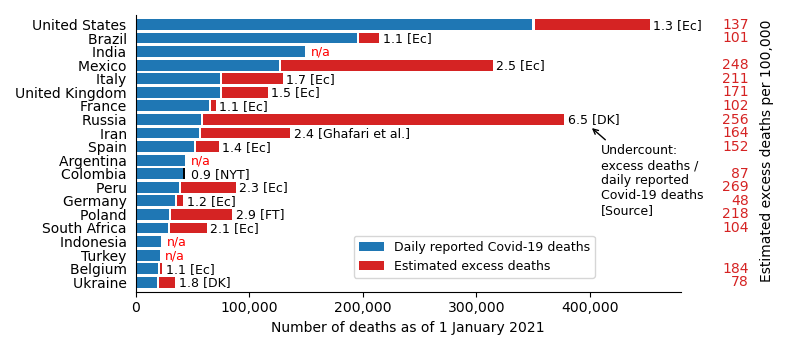

In [27]:
fig = plt.figure(figsize=(8, 3.5))

n = 20

plt.barh(-np.arange(n), df[:n]['Covid19 deaths, now'], label='Daily reported Сovid-19 deaths')
delta = df[:n]['Estimated deaths'] - df[:n]['Covid19 deaths, now']
delta[delta<0] = np.nan
plt.barh(-np.arange(n), delta, left=df[:n]['Covid19 deaths, now']+2000, color='#d52323',
         label='Estimated excess deaths')
         
plt.yticks(-np.arange(n), [a[:-2] for a in df[:n]['Country']])
plt.xlabel('Number of deaths as of 1 January 2021')

for i in np.where(delta==0)[0]:
    plt.barh(-i, 2000, left=np.array(df[:n]['Covid19 deaths, now'])[i]-2000, color='k')
for i in np.where(np.isnan(delta))[0]:
    plt.text(np.array(df[:n]['Covid19 deaths, now'])[i] + 5000, -i-.3, 'n/a', color='r', fontsize=9)
for i in range(n):
    if np.isnan(df['Estimated deaths'].values[i]):
        continue
    plt.text(df['Estimated deaths'].values[i] + 5000, -i-.3, 
             f"{df['Underreporting (excess deaths / covid19 deaths)'].values[i]:.1f} [{df['Source'].values[i]}]",
             color='k', fontsize=9)
    plt.text(540000, -i-.3, 
             f"{df['Estimated deaths per 100,000'].values[i]:.0f}",
             color='#d52323', ha='right')

plt.gca().tick_params(axis='y', length=0)

plt.gca().annotate('Undercount:\nexcess deaths /\ndaily reported\nСovid-19 deaths\n[Source]',
                   xy=(400000, -7.5), xycoords='data',
                   xytext=(410000, -14), textcoords='data',
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                   fontsize=9)

plt.text(550000,-n/2+.7,'Estimated excess deaths per 100,000', rotation=90, va='center')

plt.ylim([-n+.3,.7])
plt.xlim([0,480000])
plt.xticks(np.arange(0,400001,100000))
plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

sns.despine()
plt.tight_layout()

plt.legend(loc=(.4,.05), fontsize=9)

plt.savefig('img/countries.png', dpi=200)
plt.savefig('img/countries.pdf')